In [189]:
file = open('input.txt', 'r')

In [190]:
tiles = []
tiles_min = []

In [191]:
for line in file.readlines():
    s = line.strip().split(',')
    tiles.append((int(s[0]),int(s[1])))

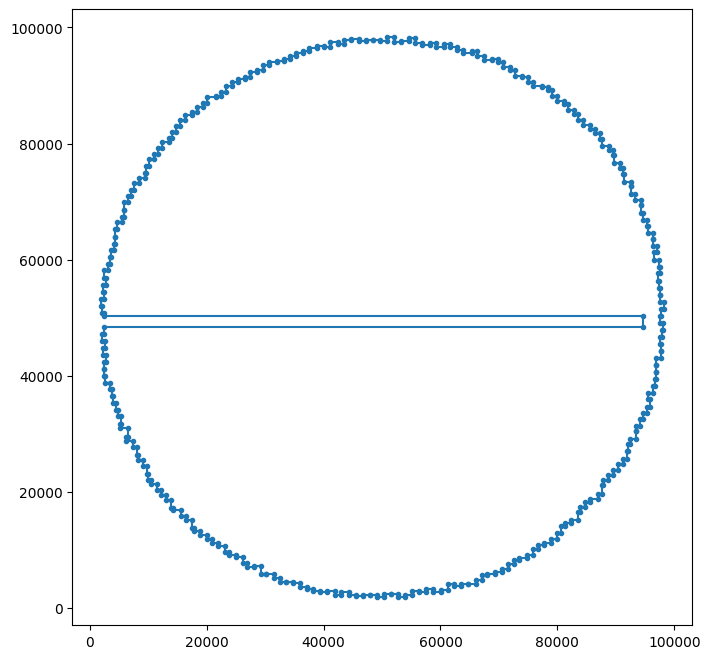

In [192]:
import matplotlib.pyplot as plt

xs = [p[0] for p in tiles]
ys = [p[1] for p in tiles]

%matplotlib inline
plt.figure(figsize=(8,8))
plt.plot(xs, ys, marker='.')
plt.show()


## lines
* 50322
* 48449

## potential corner points
* 94737,50322
* 94737,48449

In [193]:
# read maximum box from input data manually
# (94737,50322): corner point, starting point
# -> (95279,66911): last tile right from starting point
# -> 66911: highest possible row
# -> (4615,66437): check on other side for highest corner point
(94737-4615+1)*(66437-50322+1)

1452422268

In [194]:
points = [(94737,50322),(94737,48449)]

In [195]:
def check_tiles_in_area(area_coords):
    x1 = area_coords[0][0]
    x2 = area_coords[1][0]
    y1 = area_coords[0][1]
    y2 = area_coords[1][1]
    for tile in tiles:
        x_true = False
        if x1 < x2:
            if tile[0] > x1 and tile[0] < x2:
                x_true = True
        else:
            if tile[0] > x2 and tile[0] < x1:
                x_true = True
        y_true = False
        if y1 < y2:
            if tile[1] > y1 and tile[1] < y2:
                y_true = True
        else:
            if tile[1] > y2 and tile[1] < y1:
                y_true = True
        if x_true and y_true:
            return False
    return True

In [196]:
max_area = (0,0,0)
for t1 in points:
    for t2 in tiles:
        if (t1[1]<=48449 and t2[1]<=48449) or (t1[1]>=50322 and t2[1]>=50322):
            if check_tiles_in_area((t1,t2)):
                area = (abs(t1[0]-t2[0])+1) * (abs(t1[1]-t2[1])+1)
                if area > max_area[0]:
                    max_area = (area,t1,t2)
print(max_area)

(1452422268, (94737, 50322), (4615, 66437))
